In [ ]:
#keras model for prefiltering

In [ ]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )


In [ ]:
class NeuralNetwork:
    # ...

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors
        

In [ ]:
from keras.layers import Input, Embedding, Dot, Reshape, Dense
from keras.models import Model

def embedding_model(embedding_size = 50, classification = False):
    
    
    # Both inputs are 1-dimensional i want mine to be 3 dimensiona;
    book = Input(name = 'book', shape = [1])
    link = Input(name = 'link', shape = [1])
    
    # Embedding the book (shape will be (None, 1, 50))
    book_embedding = Embedding(name = 'book_embedding',
                               input_dim = len(book_index),
                               output_dim = embedding_size)(book)
    
    # Embedding the link (shape will be (None, 1, 50))
    link_embedding = Embedding(name = 'link_embedding',
                               input_dim = len(link_index),
                               output_dim = embedding_size)(link)
    
    # Merge the layers with a dot product along the second axis 
    # (shape will be (None, 1, 1))
    merged = Dot(name = 'dot_product', normalize = True, 
                 axes = 2)([book_embedding, link_embedding])
    
    # Reshape to be a single number (shape will be (None, 1))
    merged = Reshape(target_shape = [1])(merged)
    
    # Squash outputs for classification
    out = Dense(1, activation = 'sigmoid')(merged)
    model = Model(inputs = [book, link], outputs = out)
    
    # Compile using specified optimizer and loss 
    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    
    return model

#Dot Product Matrix Multiplication 

---
Basic Layer of Neural Network:
**h=wx+b**
where: 

w=weights

b=bias

h=output

x=inputs

x would be a vector row and weights a vector column. 

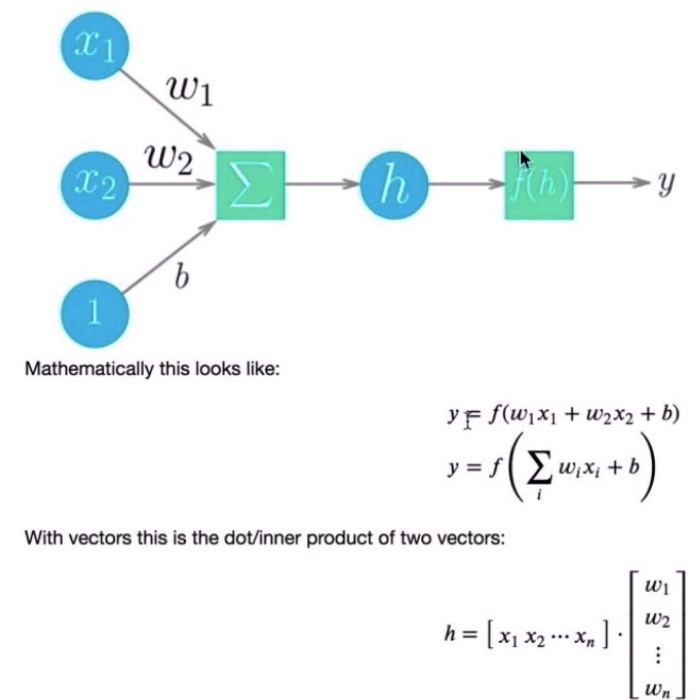





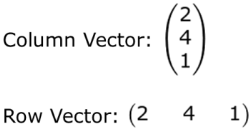

If m is the numbers, column vectors are 1*m (1 by m) whereas row vectors are m*1 (m by 1) think of width by height.
When you want to find m by n, you find the summation of the multiplication the first term of the column by the first term of the row.


This link explains topic wel: https://medium.com/data-science-bootcamp/understand-dot-products-matrix-multiplications-usage-in-deep-learning-in-minutes-beginner-95edf2e66155



---




#Stages for Content Aware Filtering

**Datacleaning:**
Courses vectorised into 3D array based on:

a.Subject

b.Level (Break into school levels?)

c.Medium

Use Neural Network embeddings to vectorise 

---



1. Prefiltering: Booleans for course type. Based on choice, leads to different Rec system. For Books, use term-frequency/Inverse-Document-Frequency , for MOOCs match user inputted metrics to metrics in MOOC-data set(Mooc-metric/user-metric=1 means a match) use find() action.
For videos, use term-frequency/Inverse-Document-Frequency.



2. Postfiltering: Ratings are predicted based on similarity weight from pre-filtering multiplied by maxium rating. then the results are filtered using predicted ratings/actual rating normalizing factor and m<=n(where m is cutoff value and n is positive number output). Later: User actions quantified into rating e.g deleting course=0 rating.

3. Modeling: New weights from postfiltering stage used update user course predictions. User course reccomendations resorted based on new weights(lowered weights go to the bottom, higher weights remain at the top). Content based filtering---cosine similarity between highest ranked reccomendation of highest ranked course and other course vectors. (Sorted based on smallest value of cosine). Highest value of cosine appears as secondary reccomendation.



---



#Methodology For Datacleaning
(Using Contexual-Framework for output, content based for data-cleaning)


**Term Key:**

F=Fully observable: The contextual factors are known explicitly.

P=Partially observable: Only some information is known explicitly.

U=Unobservable: No explicit information. Needs to be modeled using latent variables



**1. Learning Goal (P):**

Break this down into extractable data:
a. Subjects--can use term frequency for subjects
b. Topics term-frequency/Inverse-Document-Frequency




2. **Current Proficiency(F but also U)**

Selected generic Values that are weighted to dataset(used in vectorization)

3. **Preferred Medium (Courses, books, youtube)(F)**

Use Boolean for user to choose this.



In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

#downloading kaggle
!pip install kaggle




Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Import OS for navigation and environment set up
import os
# Check current location, '/content' is the Colab virtual machine
os.getcwd()
# Enable the Kaggle environment, use the path to the directory your Kaggle API JSON is stored in
os.environ['KAGGLE_CONFIG_DIR'] = '../gdrive/MyDrive/kaggle'


In [ ]:
!pip install kaggle

from google.colab import files
uploaded = files.upload()

